# Analizar gráfos en Python

Este notebook muestra métodos estándares para analizar gráfos a través de la librería NetworkX https://networkx.org.
    

## 0. Algunos recordatorios sobre Teoría de gráfos

- analizar estructuras sociales, difusión de información, interacciones, influencias, etc. (cualquier fenómeno que se puede representar como gŕafo...)

- **conceptos**: nodo (_node_) y arista (_edge_)

<img src="grafo1.png">

- distintos **tipos de gráfo**:
    - gráfo simple
    - gráfo dirigido
    - gráfo dirigido multi-aristas
    - gráfo ponderado

<img src="grafo2.png">

- ¿Por qué analizar gráfos?:
    - métricas de **centralidad**: identificar cuáles son los nodos importantes
    - métricas de **conectividad**: identificar cuáles los nodos importantes en relación con el peso y la dirección de sus aristas (gráfos dirigidos)
    - métricas de **comunidad**: identificar cuáles son los sub-grupos (_clique_)
    - métricas de **camino**: identificar distancias entre nodos
    - etc.

In [149]:
#!pip install networkx

In [150]:
import networkx as nx

## 1. Crear un gráfo simple

In [151]:
G = nx.Graph()

#Borrar el gráfo
G.clear()

- Nodos

In [152]:
# Añadir un nodo
G.add_node(1)

# Añadir nodos desde una lista
G.add_nodes_from([2, 3])

# Añadir nodos con datos
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

G.add_node(6)

- Aristas

In [153]:
#Añadir una arista
G.add_edge(1, 2)

#Añadir varias aristas
G.add_edges_from([(1, 3), (1, 4)])

#Añadir aristas con datos
G.add_edges_from([(2, 5, {'weight': 3.1415})])

G.add_weighted_edges_from([(6,7,3)])

- Acceder a datos almacenados en nodos o aristas

In [154]:
G.nodes[4]

{'color': 'red'}

In [155]:
G.nodes[5]["color"]

'green'

In [156]:
G[2][5]

{'weight': 3.1415}

In [157]:
G[2][5]["weight"]

3.1415

In [158]:
G.edges[2, 5]['weight']

3.1415

In [159]:
G.edges[2, 5]['weight'] = 4.2

In [160]:
G.edges[2, 5]['weight']

4.2

In [161]:
G.edges[6,7]

{'weight': 3}

- Ver los vecinos de un nodo

In [162]:
G.adj[2]

AtlasView({1: {}, 5: {'weight': 4.2}})

- Dibujar el gráfo

In [163]:
import matplotlib.pyplot as plt

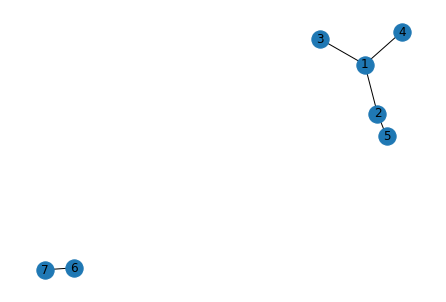

In [164]:
nx.draw(G, with_labels=True)

## 2. Crear un gráfo dirigido

In [174]:
DG = nx.DiGraph()

In [175]:
G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "green"}),
    (4, {"color": "green"}),
])

In [176]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (4, 1, 0.5)])

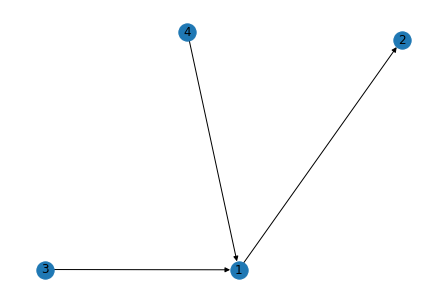

In [177]:
nx.draw(DG, with_labels=True)

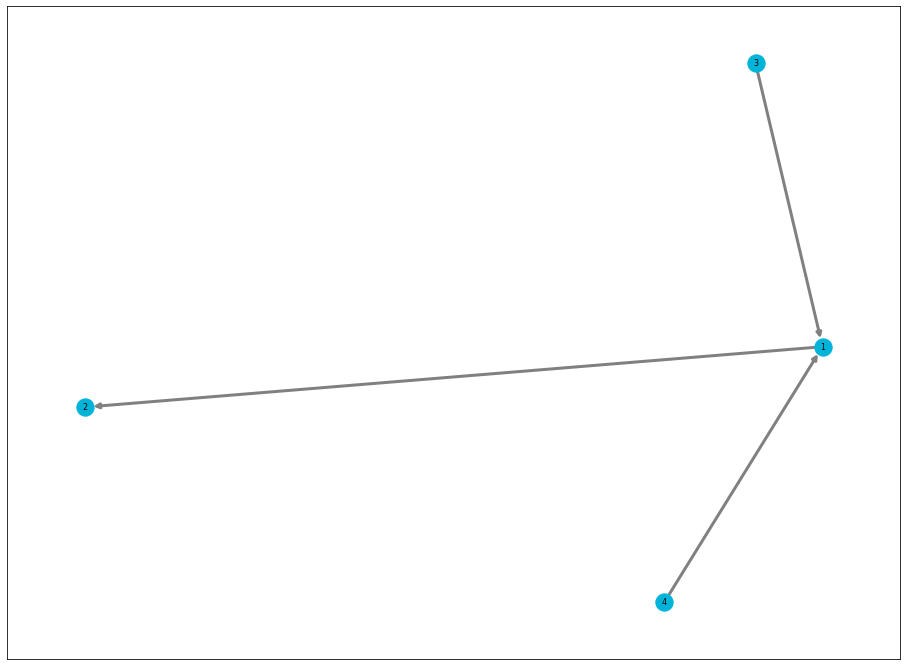

In [178]:
fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=2)# Plot networks
nx.draw_networkx(DG, pos,
                 font_size=8,
                 width=3,
                 edge_color='grey',
                 node_color='#00b4d9',
                 with_labels = True,
                 ax=ax)
plt.show()

## 3. Métricas sobre el gráfo

- Nivel **Centralidad** de los nodos

In [179]:
nx.degree_centrality(G)

{1: 0.5,
 2: 0.3333333333333333,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666,
 7: 0.16666666666666666}

In [180]:
nx.in_degree_centrality(DG)

{1: 0.6666666666666666, 2: 0.3333333333333333, 3: 0.0, 4: 0.0}

In [181]:
nx.out_degree_centrality(DG)

{1: 0.3333333333333333, 2: 0.0, 3: 0.3333333333333333, 4: 0.3333333333333333}

In [182]:
nx.eigenvector_centrality(G)

{1: 0.6532814742567121,
 2: 0.5000000150026442,
 3: 0.3535533799372703,
 4: 0.3535533799372703,
 5: 0.270598069700722,
 6: 8.198769419007958e-06,
 7: 8.198769419007958e-06}

In [185]:
nx.closeness_centrality(G)

{1: 0.5333333333333333,
 2: 0.4444444444444444,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.2962962962962963,
 6: 0.16666666666666666,
 7: 0.16666666666666666}

- Métricas de **Comunidad**

In [187]:
list(nx.enumerate_all_cliques(G))

[[1], [2], [3], [4], [5], [6], [7], [1, 2], [1, 3], [1, 4], [2, 5], [6, 7]]

- Métricas de Distancia

In [193]:
nx.shortest_path(G)

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 2, 5]},
 2: {2: [2], 1: [2, 1], 5: [2, 5], 3: [2, 1, 3], 4: [2, 1, 4]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2], 4: [3, 1, 4], 5: [3, 1, 2, 5]},
 4: {4: [4], 1: [4, 1], 2: [4, 1, 2], 3: [4, 1, 3], 5: [4, 1, 2, 5]},
 5: {5: [5], 2: [5, 2], 1: [5, 2, 1], 3: [5, 2, 1, 3], 4: [5, 2, 1, 4]},
 6: {6: [6], 7: [6, 7]},
 7: {7: [7], 6: [7, 6]}}